In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

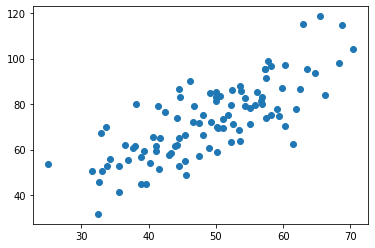

In [13]:
df = pd.read_csv('/home/iftekhar/Downloads/gradientdata.csv')
plt.scatter(df.humidity,df.temp)
plt.show()

In [28]:
df.head()

,humidity,temp
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [15]:
# "sum of squared errors". 
# This is how we calculate our error
def compute_error_for_line_given_points(b,m,df):
	totalError = 0 	
	for i in range (0, len(df)):
		hum_x = df['humidity'][i]
		temp_y = df['temp'][i]
		totalError += (temp_y-(m*hum_x + b)) ** 2  #sum of square error formula
	return totalError/float(len(df))

In [16]:
raw = compute_error_for_line_given_points(0.0,0.5,df)
raw

2502.4966449576996

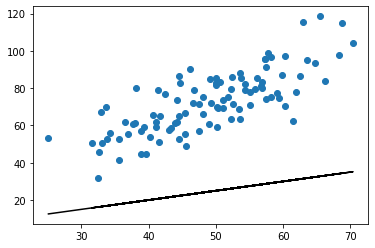

Done! 
Temparature:  [16.2511726347265, 26.713402016637502, 30.765179012818198, 23.73781981739305, 29.90660393475615, 27.5710942069719, 26.105898346107, 19.64978334715855, 24.052520845884146, 26.275007221366895, 22.709865072486895, 27.17581744061445, 22.082024748386697, 29.0842353584289, 28.363604028548302, 24.477944283046853, 22.34359811574045, 30.14866342566675, 22.8093218864779, 19.4084087687228, 33.0949083033763, 32.708025872567056, 23.74060430393395, 20.7878213087435, 25.9225934528197, 29.685411005544747, 28.655001719174052, 31.807780625726647, 23.3688097039885, 25.278380074273898, 26.111998042776552, 17.783915023873302, 21.2182384720278, 29.08227005509645, 28.752223807670898, 22.72026536266, 30.94811134014565, 16.546915868082, 18.21800475569345, 18.83782743042535, 22.277804191637696, 21.65914131593285, 25.0365728161445, 21.9353063226092, 31.49874037377655, 16.3345218817336, 20.08344950435185, 26.78753876583685, 16.932107485889098, 32.35356933306065, 19.0599120134114, 22.251269032

In [19]:
plotting_chart(0,0.5,df)

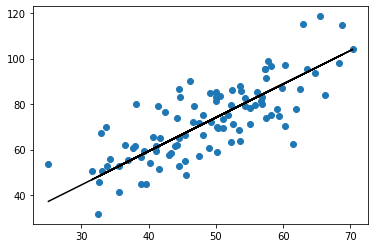

Done! 
Temparature:  [48.11908499665671, 79.04008017068512, 91.01505915191048, 70.24578218082814, 88.47755066531596, 81.57497929304479, 77.24461025897047, 58.1636387529726, 71.17587734773964, 77.74440953930716, 67.20767409257316, 80.40674348604972, 65.35209944180816, 86.04705006628944, 83.91723269562293, 72.43321128367594, 66.12517643470835, 89.19295462723018, 67.50161752978714, 57.45025904177555, 97.90054651034015, 96.757120062756, 70.25401169786035, 61.52709648587902, 76.70285481528728, 87.8238175796602, 84.77845512314306, 94.09645588527934, 69.15517715591082, 74.79888979579535, 77.26263784032022, 52.649086996018355, 62.799189320293806, 86.04124163553918, 85.06579385559502, 67.23841202714827, 91.55571348130664, 48.99315062430849, 53.932034063295745, 55.76391264619848, 65.93072327033985, 64.1022724597416, 74.08423130488215, 64.91847487004617, 93.18309107646992, 48.36542271019618, 59.44533395045107, 79.25919045593413, 50.131579894066476, 95.70952795333137, 56.42028100403728, 65.8522989

In [27]:
plotting_chart(b,m,df)

In [18]:
 def plotting_chart(b, m, df):
    prediction_y = []
    for i in range(len(df)):
        hum_x = df['humidity'][i]
        y_predict_temp = b + m*hum_x # y = b+mx
        prediction_y.append(y_predict_temp)
    plt.scatter(df.humidity, df.temp)
    plt.plot(df.humidity, prediction_y,'k-')
    plt.show()
    print("Done! \nTemparature: ", prediction_y)

In [60]:
def step_gradient(b_current, m_current, df, learning_rate):
	#gradient descent
	b_gradient = 0
	m_gradient = 0
	N = float(len(df))
	for i in range(0, len(df)):
		x = df['humidity'][i]
		y = df['temp'][i]
		b_gradient += -(2/N) * (y - (m_current * x + b_current))
		m_gradient += -(2/N) * x * (y - (m_current * x + b_current))
	new_b = b_current - (learning_rate * b_gradient)
	new_m = m_current - (learning_rate * m_gradient) 
	return [new_b, new_m]

def gradient_descent_runner(df, starting_b, starting_m, learning_rate, num_iteartions):
	b = starting_b
	m = starting_m
	for i in range(num_iteartions):
		b,m = step_gradient(b, m, df, learning_rate)
		# print(b, m)
	return [b,m]

In [62]:
b, m = gradient_descent_runner(df, 0, 0, 0.0001, 1000)
print(b,m)

0.08893651993741386 1.4777440851894446


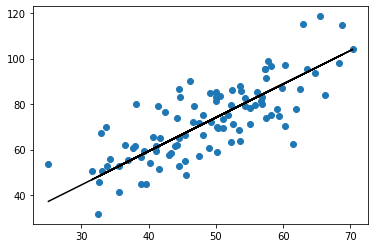

Done! 
Temparature:  [48.11908499665671, 79.04008017068512, 91.01505915191048, 70.24578218082814, 88.47755066531596, 81.57497929304479, 77.24461025897047, 58.1636387529726, 71.17587734773964, 77.74440953930716, 67.20767409257316, 80.40674348604972, 65.35209944180816, 86.04705006628944, 83.91723269562293, 72.43321128367594, 66.12517643470835, 89.19295462723018, 67.50161752978714, 57.45025904177555, 97.90054651034015, 96.757120062756, 70.25401169786035, 61.52709648587902, 76.70285481528728, 87.8238175796602, 84.77845512314306, 94.09645588527934, 69.15517715591082, 74.79888979579535, 77.26263784032022, 52.649086996018355, 62.799189320293806, 86.04124163553918, 85.06579385559502, 67.23841202714827, 91.55571348130664, 48.99315062430849, 53.932034063295745, 55.76391264619848, 65.93072327033985, 64.1022724597416, 74.08423130488215, 64.91847487004617, 93.18309107646992, 48.36542271019618, 59.44533395045107, 79.25919045593413, 50.131579894066476, 95.70952795333137, 56.42028100403728, 65.8522989

In [63]:
plotting_chart(b, m, df)

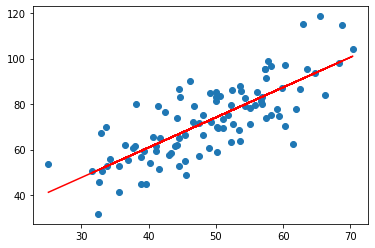

In [4]:
from sklearn.linear_model import LinearRegression
X = df.iloc[:, :-1].values
Y = df.iloc[:, 1].values
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [56]:
linear_regressor.predict(np.array([[33.0]]))

array([51.63124473])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [8]:
y_pred = linear_regressor.predict(X_test)

In [9]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [10]:
df.head()

,Actual,Predicted
0,95.455053,83.779547
1,69.588898,75.552329
2,62.562382,89.360675
3,71.139728,80.828004
4,86.642020,66.829754


In [12]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 10.100107734362876
Mean Squared Error: 152.9296871083942
Root Mean Squared Error: 12.366474320047496


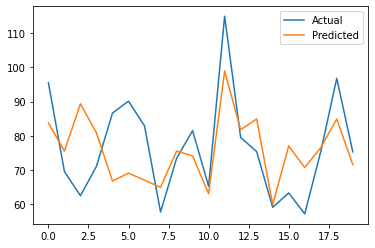

In [11]:
df.plot()